<a href="https://colab.research.google.com/github/assemayman1202-git/linear-regression-Task/blob/main/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
data = pd.read_csv('1.04. Real-life example.csv')

In [192]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


check for outliers & remove duplicates

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [194]:
data.dropna(inplace = True)

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [196]:
## limit the data
data = data[data['Price'] <= 75000]        # حذف الأسعار المبالغ فيها
data = data[data['EngineV'] <= 6.5]        # محركات منطقية فقط
data = data[data['Mileage'] <= 500]        # مسافة منطقية


<Axes: >

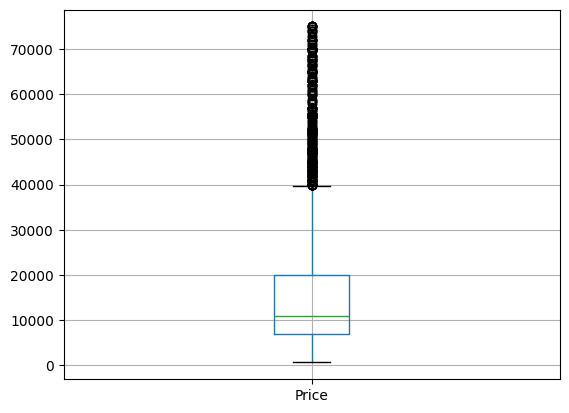

In [197]:
## check outliers
data.boxplot(column = 'Price')

<Axes: >

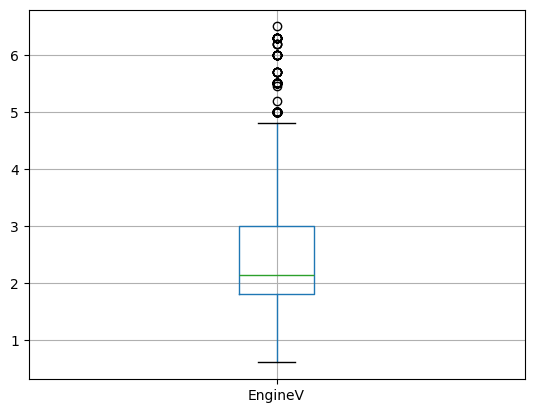

In [198]:
data.boxplot(column = 'EngineV')

<Axes: >

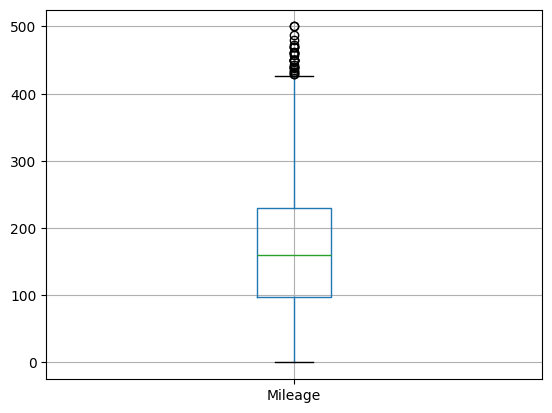

In [199]:
data.boxplot(column = 'Mileage')

Building the model with one variable

In [200]:
# split data into train and test split 80% and 20%
from sklearn.model_selection import train_test_split
x = data[['Mileage']]
y = data['Price']
Mileage_train,Mileage_test,Price_train,Price_test = train_test_split(x,y,test_size= 0.2)

In [201]:
# build the model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(Mileage_train,Price_train)

LinearRegression()

In [202]:
intercept = linear_model.intercept_
print(intercept)

28633.874763038213


In [203]:
coef = linear_model.coef_
print(coef)

[-77.04341059]


In [204]:
## R square for training model
from sklearn.metrics import mean_squared_error, r2_score
R_square = r2_score(Price_train,linear_model.predict(Mileage_train))
print(R_square)

0.29201732681418435


In [205]:
## mean square error for training model
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(Price_train,linear_model.predict(Mileage_train))
print(MSE)

133942324.74826783


In [206]:
## predict
model_predict = linear_model.predict(Mileage_test)

In [207]:
## R square for test model
from sklearn.metrics import mean_squared_error, r2_score
R_square_test = r2_score(Price_test,linear_model.predict(Mileage_test))
print(R_square_test)

0.2984940709428615


In [208]:
## mean square error for test model
from sklearn.metrics import mean_squared_error, r2_score
MSE_test = mean_squared_error(Price_test,linear_model.predict(Mileage_test))
print(MSE_test)

152324161.0423359


In [209]:
## Comparing training & test sets
key_diff = pd.DataFrame({'Metric':['R_square','MSE'],
            'training':[R_square,MSE],
            'Test':[R_square_test,MSE_test]})
print(key_diff)

     Metric      training          Test
0  R_square  2.920173e-01  2.984941e-01
1       MSE  1.339423e+08  1.523242e+08


In [210]:
## COmbining results in table
coef_table = pd.DataFrame({
    'Variable'   : ['Mileage'],
    'Coefficient': [linear_model.coef_[0]],
    'Intercept'  : [linear_model.intercept_]})
print(coef_table)

  Variable  Coefficient     Intercept
0  Mileage   -77.043411  28633.874763


adding more varaibles for more accuracy

In [211]:
# split data into train and test split 80% and 20%
from sklearn.model_selection import train_test_split
x = data[['Mileage','EngineV','Year']]
y = data['Price']
Mileage_train,Mileage_test,Price_train,Price_test = train_test_split(x,y,test_size= 0.2)

In [212]:
# build the model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(Mileage_train,Price_train)

LinearRegression()

In [213]:
intercept = linear_model.intercept_
print(intercept)

-1669298.3812078135


In [214]:
coef = linear_model.coef_
print(coef)

[ -43.03174853 6560.747746    835.69396257]


In [215]:
## R square for training model
from sklearn.metrics import mean_squared_error, r2_score
R_square = r2_score(Price_train,linear_model.predict(Mileage_train))
print(R_square)

0.572085678168909


In [216]:
## mean square error for training model
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(Price_train,linear_model.predict(Mileage_train))
print(MSE)

84872478.91531056


In [217]:
## predict
model_predict = linear_model.predict(Mileage_test)

In [218]:
## R square for test model
from sklearn.metrics import mean_squared_error, r2_score
R_square_test = r2_score(Price_test,linear_model.predict(Mileage_test))
print(R_square_test)

0.5318390515345162


In [219]:
## mean square error for test model
from sklearn.metrics import mean_squared_error, r2_score
MSE_test = mean_squared_error(Price_test,linear_model.predict(Mileage_test))
print(MSE_test)

84804053.81292564


In [220]:
## Comparing training & test sets
key_diff = pd.DataFrame({'Metric':['R_square','MSE'],
            'training':[R_square,MSE],
            'Test':[R_square_test,MSE_test]})
print(key_diff)

     Metric      training          Test
0  R_square  5.720857e-01  5.318391e-01
1       MSE  8.487248e+07  8.480405e+07


In [221]:
## COmbining results in table
coef_table = pd.DataFrame({
    'Variable'   : ['Mileage','EngineV','Year'],
    'Coefficient': [linear_model.coef_[0],linear_model.coef_[1],linear_model.coef_[2]],
    'Intercept'  : [linear_model.intercept_,'-','-']})
print(coef_table)

  Variable  Coefficient       Intercept
0  Mileage   -43.031749 -1669298.381208
1  EngineV  6560.747746               -
2     Year   835.693963               -
